## Research question 5
Does lack of family support or educational support contribute as a factor to consuming alcohol?


In [17]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import scikitplot as skplt

from sklearn import set_config
set_config(transform_output = "pandas")

## function to save hq figs

In [18]:
from pathlib import Path
IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [19]:
# Import train and test sets
X_train = pd.read_csv('smoteTrainSet.csv')
X_test = pd.read_csv('ScaledTestSet.csv')
for col in X_test.columns:
    print(col)

sex_F
sex_M
famsize_GT3
famsize_LE3
Pstatus_A
Pstatus_T
Mjob_at_home
Mjob_health
Mjob_other
Mjob_services
Mjob_teacher
Fjob_at_home
Fjob_health
Fjob_other
Fjob_services
Fjob_teacher
guardian_father
guardian_mother
guardian_other
schoolsup_no
schoolsup_yes
famsup_no
famsup_yes
paid_no
paid_yes
activities_no
activities_yes
higher_no
higher_yes
romantic_no
romantic_yes
age
Medu
Fedu
studytime
failures
famrel
freetime
goout
health
absences
avg_grade
alc


In [20]:
# Separate target from dataset
y_train = X_train['alc']
#X_train = X_train.drop(columns = ['alc'])
X_train = X_train [['famsup_no', 'famsup_yes']] 
y_test = X_test['alc']
X_test = X_test [['famsup_no', 'famsup_yes']]
#X_test = X_test.drop(columns = 'alc')

## ZeroR Classifier

In [21]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent")



In [22]:
dummy.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [23]:
from sklearn.metrics import accuracy_score
print('Train Accuracy', accuracy_score(y_train, dummy.predict(X_train)))
print('Test Accuracy', accuracy_score(y_test, dummy.predict(X_test)))

Train Accuracy 0.5
Test Accuracy 0.5502392344497608


## Hyerparameter Tuning on KNN Classifier

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [25]:
param_grid = {
    'n_neighbors' : [5, 10, 25, 50],
    'weights' : ['uniform', 'distance']
}


In [26]:
knn_grid = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_knn.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 25, 50],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [27]:
best_grid_knn = grid_search_knn.best_estimator_

In [28]:
best_grid_knn

KNeighborsClassifier()

## Applying best estimators in KNN classifiers


[[75 40]
 [53 41]]
Accuracy Score 0.5550239234449761
Classification report:               precision    recall  f1-score   support

         0.0       0.59      0.65      0.62       115
         1.0       0.51      0.44      0.47        94

    accuracy                           0.56       209
   macro avg       0.55      0.54      0.54       209
weighted avg       0.55      0.56      0.55       209



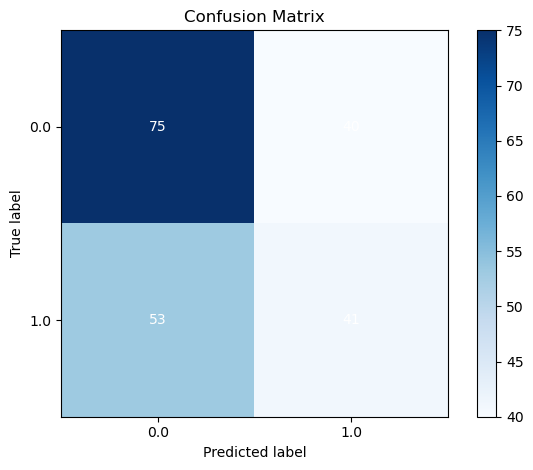

In [29]:
best_grid_knn.fit(X_train, y_train)
y_pred=best_grid_knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for KNN hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

In [30]:
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

,y_test,y_pred
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
204,1.0,1.0
205,1.0,0.0
206,0.0,0.0
207,0.0,0.0


In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
import scikitplot as skplt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('Test Accuracy ', accuracy_score(y_test, y_pred ))

Test Accuracy  0.5550239234449761


              precision    recall  f1-score   support

         0.0       0.59      0.65      0.62       115
         1.0       0.51      0.44      0.47        94

    accuracy                           0.56       209
   macro avg       0.55      0.54      0.54       209
weighted avg       0.55      0.56      0.55       209



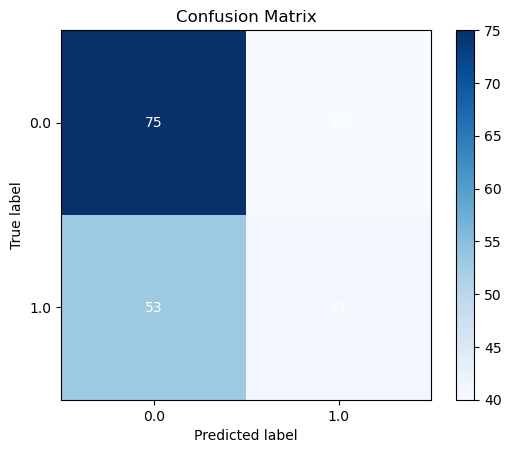

In [33]:
print(classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);

## Hyperparameter tuning on Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
param_grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [5, 10, 15, 30],
    'max_features' : ['auto', 'sqrt']
}

In [36]:
dt_grid = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=dt_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_dt.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


C:\Users\nafis\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15, 30],
                         'max_features': ['auto', 'sqrt'],
                         'splitter': ['best', 'random']},
             verbose=2)

In [37]:
best_grid_dt = grid_search_dt.best_estimator_
best_grid_dt

DecisionTreeClassifier(max_depth=5, max_features='auto')

## Appying best estimators on Decision Tree

C:\Users\nafis\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[[75 40]
 [53 41]]
Accuracy Score 0.5550239234449761
Classification report:               precision    recall  f1-score   support

         0.0       0.59      0.65      0.62       115
         1.0       0.51      0.44      0.47        94

    accuracy                           0.56       209
   macro avg       0.55      0.54      0.54       209
weighted avg       0.55      0.56      0.55       209



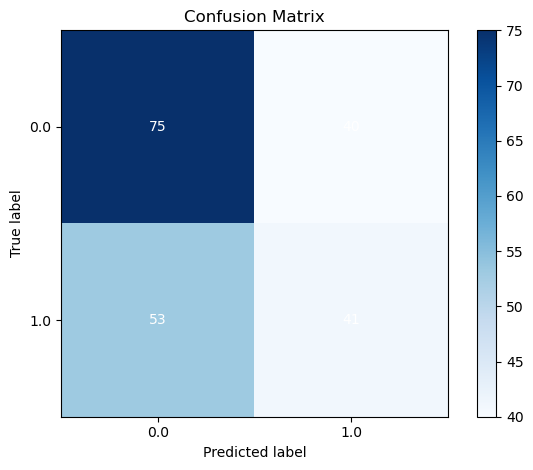

In [38]:
best_grid_dt.fit(X_train, y_train)
y_pred=best_grid_dt.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Descision_Tree hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

In [39]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Max Depth =  1 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  2 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  3 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  4 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  5 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  6 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  7 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  8 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  9 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  10 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  11 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  12 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  13 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  14 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  15 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  16 , Train Acc. =  0.533 , Test Acc. =  0.555
Max Depth =  17 , Train Acc. =  0.533 , Test Acc. =  0.555
Max De

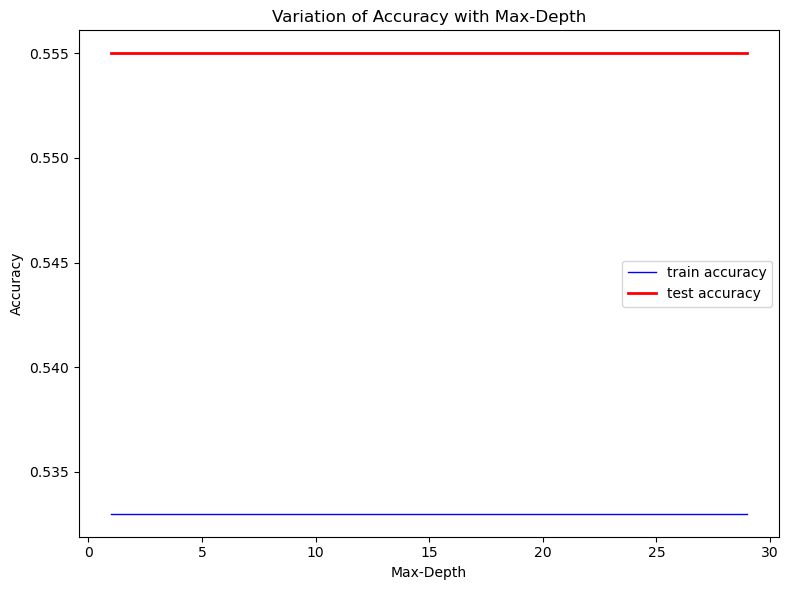

In [40]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();

In [41]:
# Confusion matrix for train set
print("Confusion Matrix for Train Set")
pd. DataFrame (confusion_matrix(y_train, best_grid_dt.predict(X_train)))

Confusion Matrix for Train Set


,0,1
0,292,166
1,262,196


In [42]:
# Confusion matrix for test set
print("Confusion Matrix for Test Set")
pd. DataFrame (confusion_matrix(y_test, best_grid_dt.predict(X_test)))

Confusion Matrix for Test Set


,0,1
0,75,40
1,53,41


In [43]:
print("Classification Report for Train Set")
print(classification_report (y_train, best_grid_dt.predict(X_train).round (3)))

Classification Report for Train Set
              precision    recall  f1-score   support

         0.0       0.53      0.64      0.58       458
         1.0       0.54      0.43      0.48       458

    accuracy                           0.53       916
   macro avg       0.53      0.53      0.53       916
weighted avg       0.53      0.53      0.53       916



In [44]:
print("Classification Report for Test Set")
print(classification_report(y_test, best_grid_dt.predict (X_test). round(3)))

Classification Report for Test Set
              precision    recall  f1-score   support

         0.0       0.59      0.65      0.62       115
         1.0       0.51      0.44      0.47        94

    accuracy                           0.56       209
   macro avg       0.55      0.54      0.54       209
weighted avg       0.55      0.56      0.55       209



## Hyperparameter Tuning on Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [46]:
param_grid= {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 30, 100],
    'max_features': [None, 'sqrt', 'log2']
}

In [47]:
rf_grid = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 30, 100],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]},
             verbose=2)

In [48]:
# Finding out the best estimator
best_grid = grid_search_rf.best_estimator_
best_grid

RandomForestClassifier(max_features=None, n_estimators=10)

In [49]:
best_grid.fit(X_train, y_train)

RandomForestClassifier(max_features=None, n_estimators=10)

In [50]:
best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[75 40]
 [53 41]]
Accuracy Score 0.5550239234449761
Classification report:               precision    recall  f1-score   support

         0.0       0.59      0.65      0.62       115
         1.0       0.51      0.44      0.47        94

    accuracy                           0.56       209
   macro avg       0.55      0.54      0.54       209
weighted avg       0.55      0.56      0.55       209



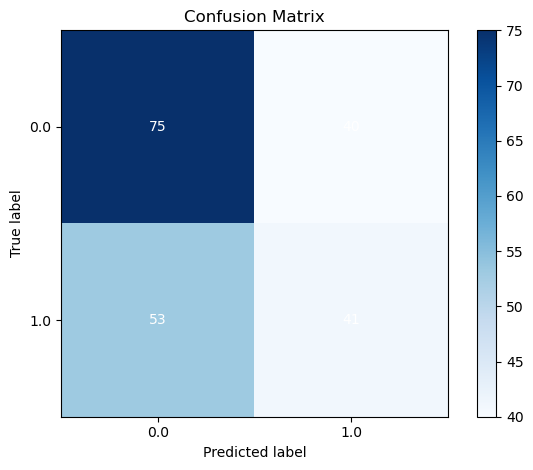

In [51]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Random forest hyper-para tuned q3')

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

[[75 40]
 [53 41]]
0.5550239234449761
              precision    recall  f1-score   support

         0.0       0.59      0.65      0.62       115
         1.0       0.51      0.44      0.47        94

    accuracy                           0.56       209
   macro avg       0.55      0.54      0.54       209
weighted avg       0.55      0.56      0.55       209



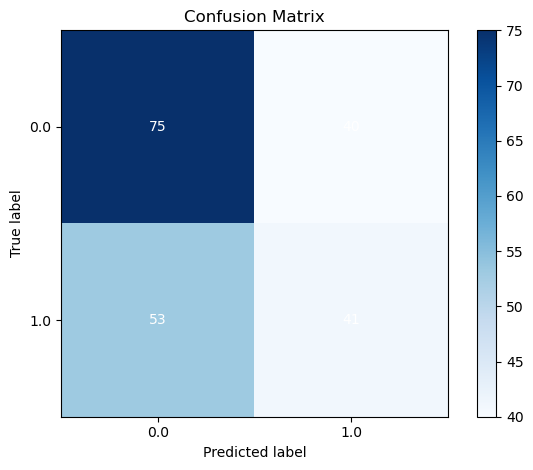

In [53]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
skplt.metrics.plot_confusion_matrix(y_test, prediction);
save_fig('Confusion Matrix for Random forest q3')
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

## Hyperparameter TUning on Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'random_state' : ['42', None],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [56]:
lr_grid = LogisticRegression()
grid_search_lr = GridSearchCV(estimator=lr_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_lr.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


C:\Users\nafis\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
350 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nafis\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nafis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "C:\Users\nafis\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\nafis\anaconda3\lib\si

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'random_state': ['42', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             verbose=2)

In [57]:
best_grid_lr = grid_search_lr.best_estimator_
best_grid_lr

LogisticRegression(penalty='l1', solver='liblinear')

[[75 40]
 [53 41]]
Accuracy Score 0.5550239234449761
Classification report:               precision    recall  f1-score   support

         0.0       0.59      0.65      0.62       115
         1.0       0.51      0.44      0.47        94

    accuracy                           0.56       209
   macro avg       0.55      0.54      0.54       209
weighted avg       0.55      0.56      0.55       209



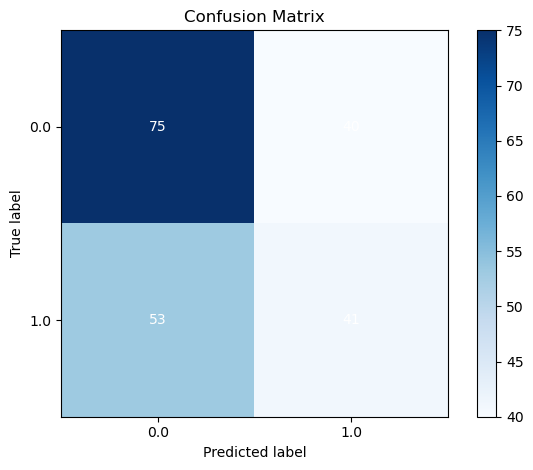

In [58]:
# Applying the best grid for logistic regression
best_grid_lr.fit(X_train, y_train)
y_pred=best_grid_lr.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Logistic Regression hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on SVM

In [59]:
from sklearn.svm import SVC

In [60]:
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'random_state' : [42, None],
    'gamma' : ['scale', 'auto'],
    'shrinking' : [True, False],
    'probability' : [True, False],
    'decision_function_shape' : ['ovo', 'ovr'],
    'break_ties' : [True, False]
}

In [ ]:
svc_grid = SVC()
grid_search_svc = GridSearchCV(estimator=svc_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_svc.fit(X_train,y_train)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


In [ ]:
best_grid_svc = grid_search_svc.best_estimator_
best_grid_svc

In [ ]:
# Applying the best grid for SVC
best_grid_svc.fit(X_train, y_train)
y_pred=best_grid_svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for SVC hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

## Ensembling learning

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## HArd voting classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc)
    ], 
    voting = 'hard'
)
voting_clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_lr, best_grid_rf, best_grid_svc, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

## Soft voting classifier

In [ ]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42, probability = True)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc)
    ], 
    voting = 'soft'
)
voting_clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_lr, best_grid_rf, best_grid_svc, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

## bagging and pasting

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

## out of bag evaluation

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
print('OOB Score', bag_clf.oob_score_)

y_pred = bag_clf.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))

## impact of no. of estimators

In [ ]:
import numpy as np
est = range(50, 500, 50)
train_acc = []
test_acc = []
oob_acc = []
estim = []
out = []
for num_est in est:
    estim.append(num_est)
    rnd_clf = RandomForestClassifier(n_estimators=num_est, oob_score = True, 
                                     max_leaf_nodes=16, n_jobs=-1, 
                                     random_state=42)
    rnd_clf.fit(X_train, y_train)
    y_pred_rf = rnd_clf.predict(X_test)
    train_acc.append(
        accuracy_score(y_train, rnd_clf.predict(X_train)))
    test_acc.append(
        accuracy_score(y_test, rnd_clf.predict(X_test)))
    oob_acc.append(rnd_clf.oob_score_)
i = 0
while i < len(estim):
    print('Num of estimators: ', estim[i], ' train acc = ', train_acc[i],
         ' test acc = ', test_acc[i], 'oob = ', oob_acc[i])
    i = i + 1

In [ ]:
plt.figure(figsize = (9,7))
plt.plot(estim, train_acc, label = 'Train Acc')
plt.plot(estim, test_acc, label = 'Test Acc')
plt.plot(estim, oob_acc, label = 'OOB Score')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## ADA boost classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
import numpy as np
est = np.linspace(1, 500, 2)
train_acc = []
test_acc = []
num_learners = []
for estimators in est:
    ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=int(estimators),
    learning_rate=0.5, random_state=42)
    ada_clf.fit(X_train, y_train)
    y_pred_test = ada_clf.predict(X_test)
    y_pred_train = ada_clf.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))
    num_learners.append(estimators)

In [ ]:
plt.figure(figsize = (9,7))
plt.plot(num_learners, train_acc, label = 'Train Acc')
plt.plot(num_learners, test_acc, label = 'Test Acc')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## XAI


## Naive Bayes